# Sign Language for Numbers
Hand Gesture Recognition Datasets for Numbers


Wecome to the code for Sign Language for Numbers. We used the data form Kaggle challenge: https://www.kaggle.com/muhammadkhalid/sign-language-for-numbers

We have downloaded the images and stored it on the local drive at the specified folder as shown in the code.

In this project, we have used SVM , KNN and CNN to predict hand gestures along with results, prediction and evaluation for each model 

In addition to this we have implemented ensseble model. 

Let's go through the code below.

# Reading Input Data and Preprocessing

In [1]:
# importing required libraries
import os
import cv2 
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Storing path of the file to a variable filepath.
dir = '/Users/vshaikh/OneDrive - Capgemini/Desktop/Py/Project/Sign Language for Numbers'
#Setting the image size 
IMG_SIZE = 64
CATEGORIES = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "unknown"]
#Use one folder for testing
#CATEGORIES = ["0"]

Label of below image is 0
Image size of zero_1.jpg is (72, 100, 3)


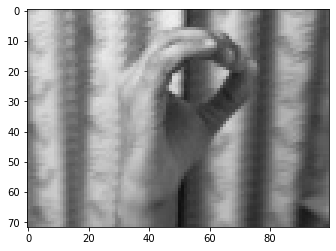

Printing the graysacle image


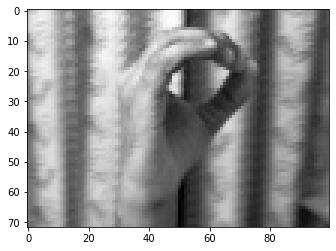

Resized image


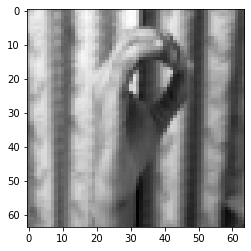

Label of below image is 1
Image size of one_1.jpg is (100, 58, 3)


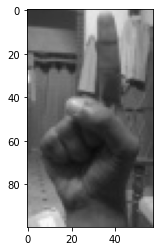

Printing the graysacle image


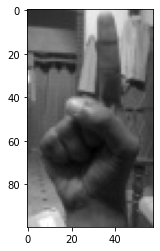

Resized image


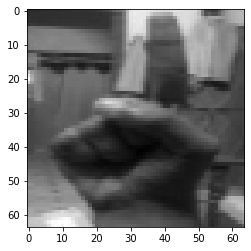

Label of below image is 2
Image size of two_1.jpg is (100, 69, 3)


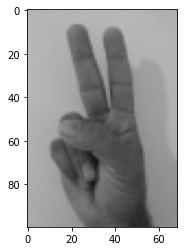

Printing the graysacle image


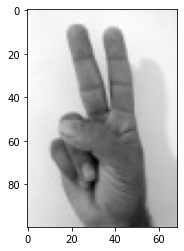

Resized image


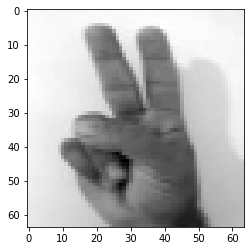

Label of below image is 3
Image size of three_1.jpg is (64, 64, 3)


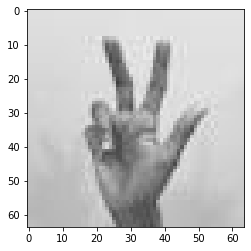

Printing the graysacle image


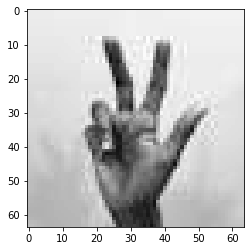

Resized image


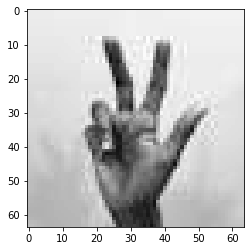

Label of below image is 4
Image size of four_1.jpg is (100, 100, 3)


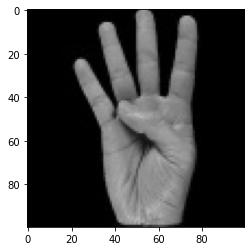

Printing the graysacle image


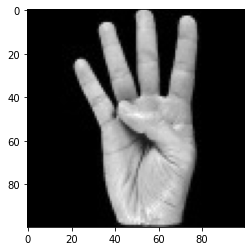

Resized image


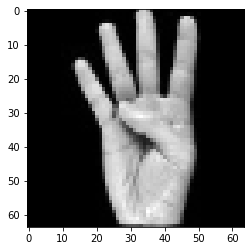

Label of below image is 5
Image size of five_1.jpg is (161, 100, 3)


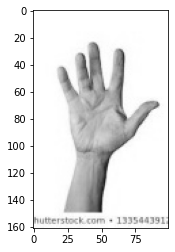

Printing the graysacle image


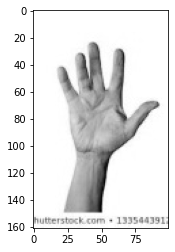

Resized image


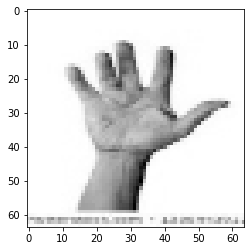

Label of below image is 6
Image size of six_1.jpg is (100, 100, 3)


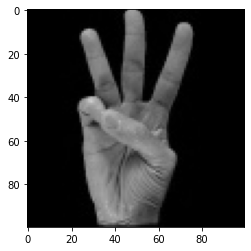

Printing the graysacle image


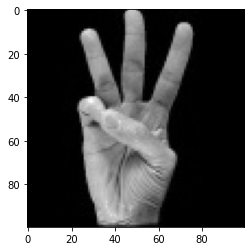

Resized image


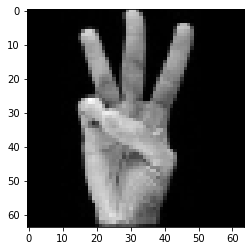

Label of below image is 7
Image size of seven_1.jpg is (100, 100, 3)


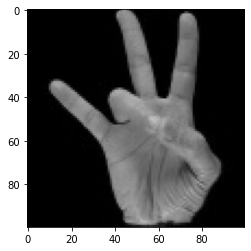

Printing the graysacle image


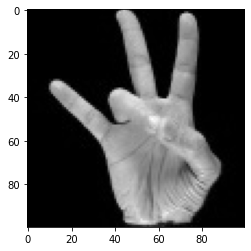

Resized image


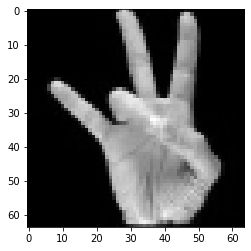

Label of below image is 8
Image size of eight_1.jpg is (100, 100, 3)


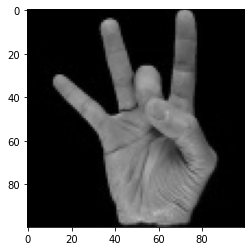

Printing the graysacle image


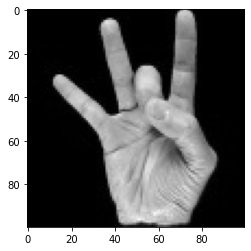

Resized image


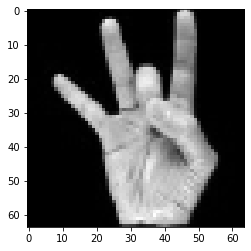

Label of below image is 9
Image size of nine_1.jpg is (100, 56, 3)


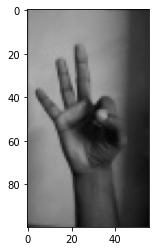

Printing the graysacle image


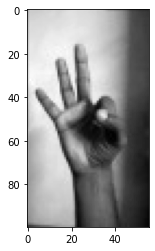

Resized image


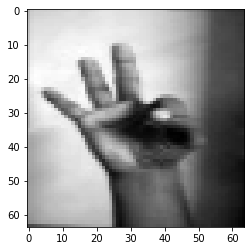

Label of below image is unknown
Image size of unknown_1.jpg is (74, 100, 3)


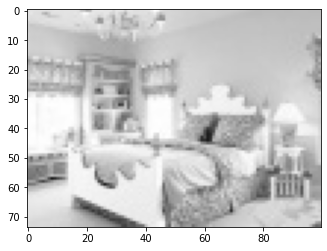

Printing the graysacle image


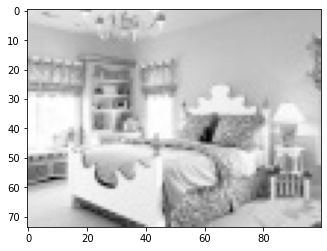

Resized image


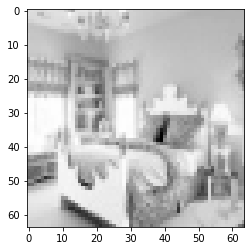

In [3]:
#Only for Visualizing the first image of each category 
for category in CATEGORIES:
    path = os.path.join(dir,category)  # create path to categories
    for img in os.listdir(path):
      # iterate over each image
      # convert to array 
      print('Label of below image is {}'.format(category))
      img_array = cv2.imread(os.path.join(path,img))
      print('Image size of {} is {}'.format(img, img_array.shape)) 
      plt.imshow(img_array, cmap = None)  # graph it
      plt.show()  # display! 

      print('Printing the graysacle image')
      img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
      plt.imshow(img_array, cmap='gray')  # graph it
      plt.show()  # display! 
      print('Resized image')
      img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      plt.imshow(img_array, cmap='gray')
      plt.show() # Show resize image
      break  # we just want one for now so break

In [4]:
'''This function will create csv file with header.Each image will have a header for pixel.'''
def get_images(directory):
    output = []
    print("Loading {}".format(directory))
    #open a file to write the header data 
    with open('output_file_with_pixels.csv', 'w+') as f: 
      f.write('FileName,Pixel,Label\n')
    
    # Iterate through each folder corresponding to a category
    for category in CATEGORIES:
        path = os.path.join(directory,category)  # create path to categories
        class_num = CATEGORIES.index(category)  # get the classification
        print('Processing folder {}'.format(category))
        # Iterate through each image in folder
        for file in tqdm(os.listdir(path)):
          # Get the path name of the image
          img_path = os.path.join(path, file)
          # Open and read the image in grayscale
          image_array = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
          # Resize the image
          image_resize = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))  
          #print('type of Image', type(Images))
          #print('type of image', type(image))
          # Append the image and its corresponding label to the output
          output.append([image_resize, class_num])
          #writing data to csv file
          flat_pixel = (image_resize.flatten())
          flat_pixel = " ".join(map(str, flat_pixel))
          with open('output_file_with_pixels.csv', 'a') as f: 
              f.write(file+',')
              f.write(flat_pixel)
              f.write(','+str(class_num))
              f.write('\n')
        #Images = np.array(Images, dtype = 'float32')
        #Labels = np.array(Labels, dtype = 'int32')   
    return output

In [5]:
image_with_label = get_images(dir)

  0%|                                                                                         | 0/1500 [00:00<?, ?it/s]

Loading /Users/vshaikh/OneDrive - Capgemini/Desktop/Py/Project/Sign Language for Numbers
Processing folder 0


  1%|▋                                                                              | 12/1500 [00:00<00:14, 101.97it/s]

Processing folder 1


  1%|▋                                                                              | 12/1500 [00:00<00:12, 119.13it/s]

Processing folder 2


  1%|▍                                                                                | 9/1500 [00:00<00:17, 83.93it/s]

Processing folder 3


  1%|▌                                                                               | 10/1500 [00:00<00:16, 87.96it/s]

Processing folder 4


  1%|▌                                                                              | 11/1500 [00:00<00:13, 108.13it/s]

Processing folder 5


  1%|▋                                                                              | 14/1500 [00:00<00:11, 133.69it/s]

Processing folder 6


  1%|▌                                                                              | 11/1500 [00:00<00:13, 106.90it/s]

Processing folder 7


  1%|▋                                                                              | 12/1500 [00:00<00:12, 116.24it/s]

Processing folder 8


  1%|▋                                                                              | 13/1500 [00:00<00:12, 122.98it/s]

Processing folder 9


  1%|▌                                                                               | 10/1500 [00:00<00:15, 94.98it/s]

Processing folder unknown


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:16<00:00, 93.65it/s]


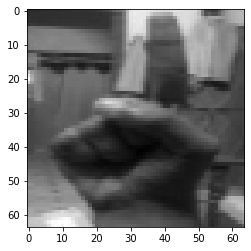

In [6]:
data  = image_with_label[0][0]
plt.imshow(image_with_label[1500][0], cmap='gray')  # graph it

In [7]:
'''Reading the file from csv'''
data = pd.read_csv('output_file_with_pixels.csv')

In [8]:
data.head()

,FileName,Pixel,Label
0,zero_1.jpg,173 190 209 219 212 192 159 141 137 141 112 10...,0
1,zero_10.jpg,99 94 98 94 94 57 67 88 101 104 103 97 88 97 1...,0
2,zero_100.jpg,98 100 102 108 120 128 135 140 145 148 148 153...,0
3,zero_1000.jpg,220 251 254 254 252 254 251 252 243 209 240 25...,0
4,zero_1001.jpg,141 137 137 140 142 145 146 149 153 154 155 15...,0


In [9]:
'''conveting input image pixel data to float value'''
data['Pixel']=data['Pixel'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [10]:
data.head()

,FileName,Pixel,Label
0,zero_1.jpg,"[173.0, 190.0, 209.0, 219.0, 212.0, 192.0, 159...",0
1,zero_10.jpg,"[99.0, 94.0, 98.0, 94.0, 94.0, 57.0, 67.0, 88....",0
2,zero_100.jpg,"[98.0, 100.0, 102.0, 108.0, 120.0, 128.0, 135....",0
3,zero_1000.jpg,"[220.0, 251.0, 254.0, 254.0, 252.0, 254.0, 251...",0
4,zero_1001.jpg,"[141.0, 137.0, 137.0, 140.0, 142.0, 145.0, 146...",0


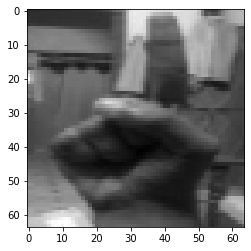

In [11]:
a =data.iloc[1500,1]
b= a.reshape(64, 64)
plt.imshow(b, cmap = 'gray')

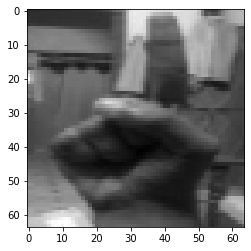

In [12]:
plt.imshow(image_with_label[1500][0], cmap = 'gray')  # graph it

# SVM - Machine Learning Model - 1

In [13]:
# Imported the necessary libraries.
# Pandas is a library use for data manipulation and analysis
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
# To implement the Support Vector Machines we will use Scikit-learn and will import our SVM
from sklearn import svm
from sklearn.metrics import accuracy_score

In [14]:
# Separate features and target columns from input dataset 
# We have only one feature i.s Pixel column
# Format Pixel column as list of data items
X = np.array(data['Pixel'].tolist())

# For SVM model it is must that we should have X and y i.e features and target less than or equal to 2 dimension.
X.shape

(16500, 4096)

In [15]:
# Our target columns is Label. We have total 11 categories.
y = np.array(data['Label'], dtype=int)

In [16]:
# Split X and y into Train and Test datasets
X_train_ML, X_test_ML, Y_train_ML, Y_test_ML = train_test_split( X, y, test_size = 0.4, random_state=40)

In [17]:
# Create SVM model. We are using Gaussian's rbf kernel.
ModelSVM = svm.SVC(kernel="rbf")

In [18]:
# Fitting the Model
ModelSVM.fit(X_train_ML, Y_train_ML)

SVC()

In [19]:
# Predict the target using test dataset
predSVM = ModelSVM.predict(X_test_ML)

In [20]:
# Prediction result
predSVM

array([4, 6, 3, ..., 7, 1, 3])

In [22]:
# Actual Value
X_test_ML

array([[153., 149., 150., ...,  93.,  95.,  98.],
       [128., 128., 129., ..., 113., 119., 126.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [131., 129., 130., ...,  96.,  98.,  99.],
       [ 28.,  32.,  33., ...,  21.,  16.,  13.],
       [137., 135., 133., ...,  45.,  48.,  51.]], dtype=float32)

In [24]:
# Calculage the accuracy score
svm_accuracy = round(accuracy_score(Y_test_ML,predSVM)*100,2)

In [25]:
# Accuracy of svc model
svm_accuracy

79.62

In [26]:
# Import scikit-learn metrics module for accuracy calculation.
from sklearn import metrics
print(metrics.classification_report(Y_test_ML, predSVM))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       566
           1       0.85      0.86      0.85       589
           2       0.79      0.79      0.79       587
           3       0.83      0.83      0.83       610
           4       0.74      0.78      0.76       624
           5       0.87      0.85      0.86       605
           6       0.89      0.80      0.84       587
           7       0.78      0.70      0.74       620
           8       0.76      0.71      0.74       635
           9       0.94      0.82      0.88       579
          10       0.62      0.77      0.69       598

    accuracy                           0.80      6600
   macro avg       0.80      0.80      0.80      6600
weighted avg       0.80      0.80      0.80      6600



Confusion matrix, without normalization
[[494   7   2   0   5   5   7   0   3   0  43]
 [ 13 508  16   2   2   2   1  13   9   1  22]
 [ 20  16 461   8  15   2  11   4   5   1  44]
 [ 10  15  14 505  14   8   1  17   6   4  16]
 [ 24   5  11  17 487   8  14  13  17   0  28]
 [ 13   0   3  14  12 512   1   4  11   5  30]
 [ 12   3  21   5  27   1 468   8   8   1  33]
 [ 13  15  21  12  33   8   5 432  56   0  25]
 [ 11  12  11  15  27  17   5  54 451  15  17]
 [  9   4   5  10  22   9   2   4  19 476  19]
 [ 38  16  19  18  10  19   8   2   5   2 461]]
Normalized confusion matrix
[[0.87279152 0.01236749 0.00353357 0.         0.00883392 0.00883392
  0.01236749 0.         0.00530035 0.         0.07597173]
 [0.02207131 0.86247878 0.02716469 0.00339559 0.00339559 0.00339559
  0.00169779 0.02207131 0.01528014 0.00169779 0.03735144]
 [0.03407155 0.02725724 0.78534923 0.01362862 0.02555366 0.00340716
  0.01873935 0.00681431 0.00851789 0.00170358 0.07495741]
 [0.01639344 0.02459016 0.02295082 0

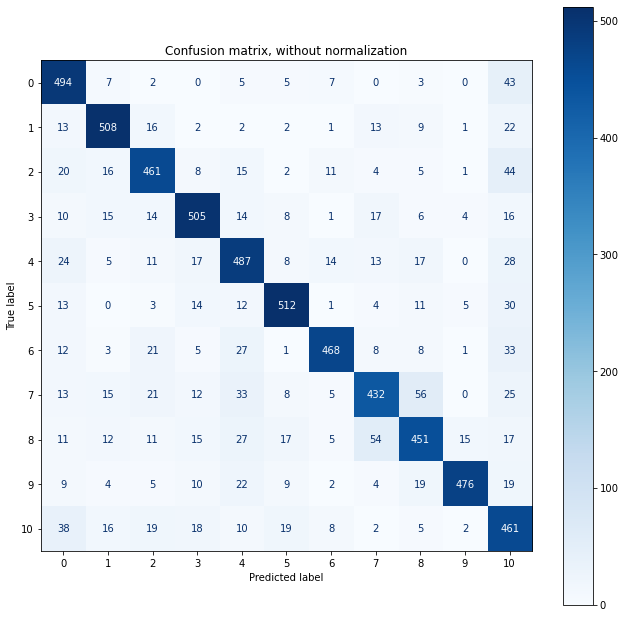

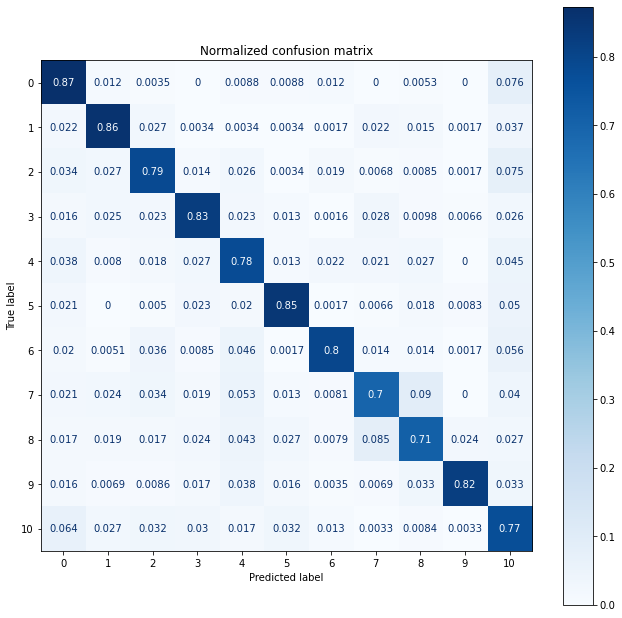

In [27]:
#Create confusion Matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['0','1','2','3','4','5','6','7','8','9','10']
for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(11, 11))
    disp = plot_confusion_matrix(ModelSVM, X_test_ML, Y_test_ML,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,ax=ax,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [28]:
print(np.array(predSVM.tolist()))

[4 6 3 ... 7 1 3]


In [29]:
# Creating Dataframes for prediction and actual values.
prd = pd.DataFrame(predSVM,columns=['Prediction'])
yts = pd.DataFrame(Y_test_ML,columns=['Actual'])

In [30]:
# Concatinating predicted and actual values dataframes.
vi_df = pd.concat([prd, yts],axis = 1)
vi_df.head()

,Prediction,Actual
0,4,4
1,6,6
2,3,3
3,4,4
4,7,7


In [31]:
# Selecting 1st 50 row for better scale visualization.
fil_df = vi_df.loc[1:50]
fil_df.head()

,Prediction,Actual
1,6,6
2,3,3
3,4,4
4,7,7
5,8,8


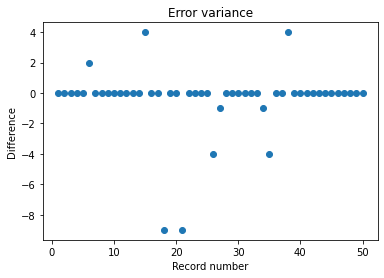

In [32]:
# This graph shows the error variance between actual value and predicted value for first 50 records.
g=plt.plot(fil_df['Actual'] - fil_df['Prediction'],marker='o',linestyle='')
# Naming x and y labels.
plt.xlabel('Record number')
plt.ylabel('Difference')
# Printing title
plt.title('Error variance')
plt.show()

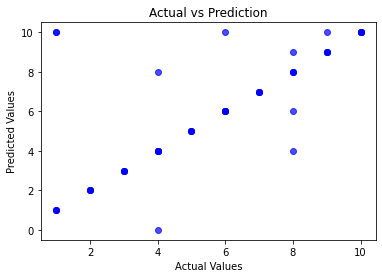

In [33]:
# Scatter plit for co relation between actual values and predicted values.
plt.scatter(fil_df['Actual'], fil_df['Prediction'], alpha=.7, color = 'b')
# Naming x and y label
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
# # Printing title
plt.title('Actual vs Prediction')
plt.show()

In [34]:
# Method for displaying the original sign language image, predicted number and actual number.
# Imported Library for displaying image.
import matplotlib.pyplot as plt
def validateML(ind,Model):
  # printing the image as per given input number.
  plt.imshow(data['Pixel'].iloc[ind].reshape(64,64))
  # Predicting the value from input pixel array for given input image number.
  test = np.array(data['Pixel'].iloc[ind])
  test = test.reshape(4096)
  pred_1= Model.predict(np.array([test]))
  print(pred_1)
      
  hand=int(pred_1)
  print("Predicted Number: "+ str(hand))
  print("Actual Number: "+ str(np.array(data['Label'].iloc[ind])))

[0]
Predicted Number: 0
Actual Number: 0


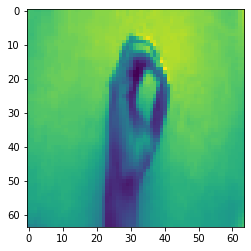

In [35]:
# Predicting test images
validateML(50,ModelSVM)

[0]
Predicted Number: 0
Actual Number: 0


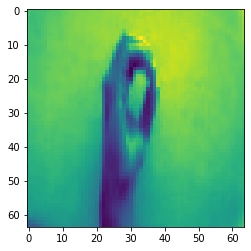

In [36]:
validateML(200,ModelSVM)

[1]
Predicted Number: 1
Actual Number: 1


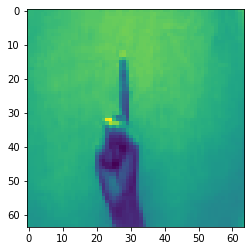

In [37]:
validateML(1922,ModelSVM)

[6]
Predicted Number: 6
Actual Number: 6


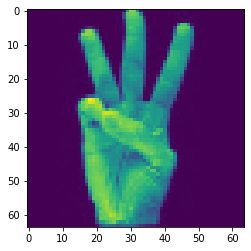

In [38]:
# printing 9000 number
validateML(9000,ModelSVM)

# KNN - Machine Learning Model - 2

In [40]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# Setup a knn classifier with k neighbors
# Try K=1 through K=10 and record testing accuracy
k_range = range(1, 5)

# We can create Python dictionary using [] or dict()
scores = []

# We are using a loop through the range 1 to 10
# We can append the scores in the dictionary
for k in k_range:
    # Create KNN Classifier
    Model_knn = KNeighborsClassifier(n_neighbors=k)
    # Train the model using the training sets
    # Fit the model
    Model_knn.fit(X_train_ML, Y_train_ML)
    # Predict the response for test dataset
    predKNN = Model_knn.predict(X_test_ML)
    # In case of classification algorithms score method represents an accuracy.
    # Evaluating the test accuracy
    scores.append(metrics.accuracy_score(Y_test_ML, predKNN))
print ('Accuracy:')
print(scores)

Accuracy:
[0.8284848484848485, 0.7922727272727272, 0.7956060606060606, 0.7893939393939394]


In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Classification report
print('Classification Report: \n',metrics.classification_report(Y_test_ML, predKNN))

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       566
           1       0.77      0.91      0.83       589
           2       0.69      0.83      0.76       587
           3       0.76      0.83      0.80       610
           4       0.72      0.81      0.76       624
           5       0.82      0.87      0.85       605
           6       0.76      0.80      0.78       587
           7       0.84      0.75      0.79       620
           8       0.83      0.79      0.81       635
           9       0.92      0.82      0.87       579
          10       0.72      0.36      0.48       598

    accuracy                           0.79      6600
   macro avg       0.79      0.79      0.78      6600
weighted avg       0.79      0.79      0.78      6600



Text(0, 0.5, 'Testing Accuracy')

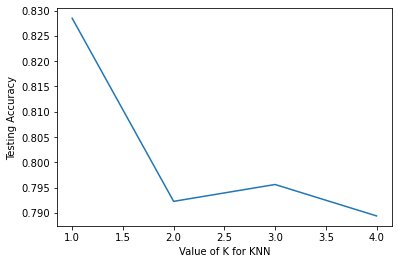

In [42]:
# Import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# Allow plots to appear within the notebook
%matplotlib inline

# Plot the relationship between K and testing accuracy
# Plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Confusion matrix, without normalization
[[516   2   3   6   6   6   9   2   0   1  15]
 [  4 536   8   3   3   6   8   2  10   2   7]
 [  8  33 489   8  12   4  14   5   7   1   6]
 [  4  30  26 508   7  11   3   4   3   1  13]
 [  4   5  14  20 507   6  19  25  12   5   7]
 [  5   2   8  18  23 526   9   2   3   2   7]
 [  2  12  36  10  29   1 467  10   8   2  10]
 [  5  14  30   8  32   4  29 467  25   2   4]
 [  1  16  15   9  31   5  15  27 499  13   4]
 [  7   5   9  15  18  10   5   6  14 477  13]
 [ 48  42  66  61  34  59  34   6  19  11 218]]
Normalized confusion matrix
[[0.91166078 0.00353357 0.00530035 0.01060071 0.01060071 0.01060071
  0.01590106 0.00353357 0.         0.00176678 0.02650177]
 [0.00679117 0.91001698 0.01358234 0.00509338 0.00509338 0.01018676
  0.01358234 0.00339559 0.01697793 0.00339559 0.01188455]
 [0.01362862 0.05621806 0.8330494  0.01362862 0.02044293 0.00681431
  0.02385009 0.00851789 0.01192504 0.00170358 0.01022147]
 [0.00655738 0.04918033 0.04262295 0

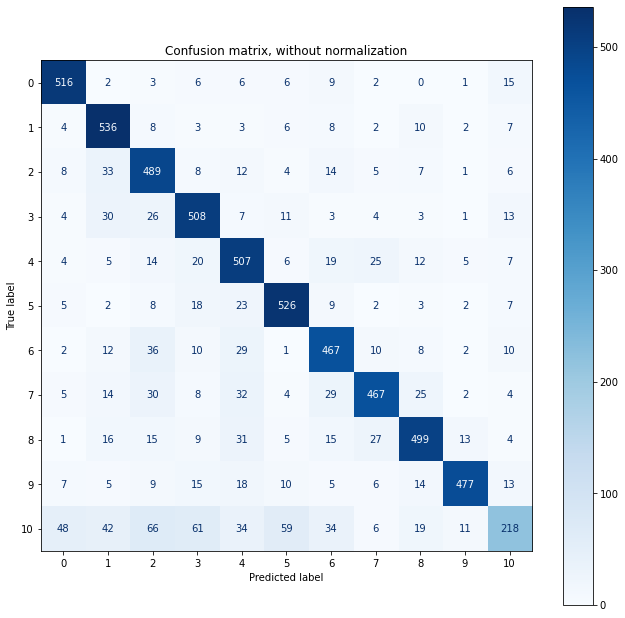

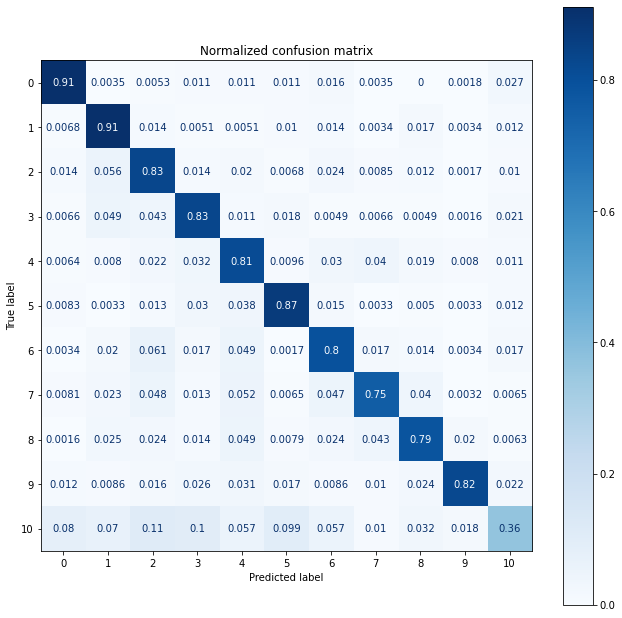

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
Class_names= ['0','1','2','3','4','5','6','7','8','9','10']
for title, normalize in titles_options:
  fig,ax =  plt.subplots(figsize=(11,11))
  disp = plot_confusion_matrix(Model_knn, X_test_ML, Y_test_ML,
                               display_labels= Class_names,
                               cmap= plt.cm.Blues,ax=ax,
                               normalize = normalize)
  disp.ax_.set_title(title)
   
  print(title)
  print(disp.confusion_matrix)
plt.show()

In [44]:
# Printing the prediction numbers
predKNN

array([4, 6, 9, ..., 7, 1, 3])

In [45]:
# Printing the test data 
Y_test_ML

array([4, 6, 3, ..., 7, 1, 3])

[0]
Predicted Number: 0
Actual Number: 0


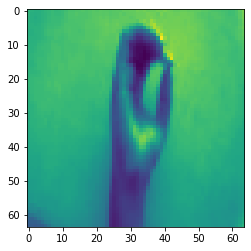

In [46]:
# Predicting test image
validateML(100,Model_knn)

[0]
Predicted Number: 0
Actual Number: 0


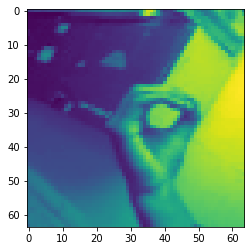

In [47]:
# Predicting the test image
validateML(1000,Model_knn)

# CNN - Deep Learning Model - 3

In [48]:
# Importing required libraries for CNN implementation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [49]:
# Function for convolution layer
def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same')(input_tensor)
    x= Activation('relu')(x)

    return x

In [50]:
# CNN model - The default structure for the convolutional layers in the model is 
# based on a Conv2D layer with a ReLU activation function, followed by a BatchNormalization 
# layer, a MaxPooling and a Dropout layer. Each of these default layers is then followed by 
# the final layer for each feature, composed by a Dense layer.

def modelCNN(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,64)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  flatten= Flatten() (maxp_3)
  dense_1= Dense(128,activation='relu')(flatten)
  hand = Dense(11,activation="softmax",name='hand')(dense_1)
   
  modelCNN = Model(inputs=inputs, outputs = hand)

  modelCNN.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return modelCNN

In [51]:
# Converting input image pixel data to an array and reshaping it.
X = np.array(data['Pixel'].tolist())
X = X.reshape(X.shape[0],64,64,1)

In [52]:
# Converting labels to category
from keras.utils import to_categorical
labels_f=to_categorical(np.array(data['Label'], dtype=int))

In [53]:
# Splitting input data in train and test 70/30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, labels_f,test_size=0.30, random_state=40)

In [54]:
# Initializing the CNN model
ModelCNN=modelCNN((64,64,1))

In [55]:
# Prininting CNN model
ModelCNN.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)       

In [56]:
# Defining model checkpoints and callback
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
fle_s='hand_ges_CNN.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [57]:
# Fitting CNN model on training data
History=ModelCNN.fit(X_train,Y_train,batch_size=64,validation_data=(X_test,Y_test),epochs=500,callbacks=[callback_list])

Epoch 1/500
181/181 [==============================] - ETA: 0s - loss: 3.3471 - accuracy: 0.3455
Epoch 00001: val_loss improved from inf to 1.65937, saving model to hand_ges_CNN.h5
181/181 [==============================] - 72s 396ms/step - loss: 3.3471 - accuracy: 0.3455 - val_loss: 1.6594 - val_accuracy: 0.4519
Epoch 2/500
181/181 [==============================] - ETA: 0s - loss: 1.0173 - accuracy: 0.6779
Epoch 00002: val_loss improved from 1.65937 to 0.75071, saving model to hand_ges_CNN.h5
181/181 [==============================] - 66s 365ms/step - loss: 1.0173 - accuracy: 0.6779 - val_loss: 0.7507 - val_accuracy: 0.7638
Epoch 3/500
181/181 [==============================] - ETA: 0s - loss: 0.5128 - accuracy: 0.8381
Epoch 00003: val_loss improved from 0.75071 to 0.74465, saving model to hand_ges_CNN.h5
181/181 [==============================] - 69s 382ms/step - loss: 0.5128 - accuracy: 0.8381 - val_loss: 0.7447 - val_accuracy: 0.7907
Epoch 4/500
181/181 [==========================

In [58]:
# Evaluating CNN model on test data
ModelCNN.evaluate(X_test,Y_test)

155/155 [==============================] - 6s 39ms/step - loss: 0.4143 - accuracy: 0.8901


[0.41431161761283875, 0.8901010155677795]

In [59]:
# Model prediction on test data
predCNN=ModelCNN.predict(X_test)
print(predCNN)

[[6.47551133e-07 2.89460101e-12 1.04322744e-05 ... 1.19897950e-05
  4.94795386e-05 3.00872841e-07]
 [6.08528990e-06 1.06076811e-07 1.83149171e-03 ... 2.26420013e-07
  1.05925824e-10 1.99286951e-08]
 [1.21651333e-09 2.49985189e-18 6.20423445e-14 ... 4.73028630e-11
  3.70272710e-17 5.56299729e-11]
 ...
 [4.86658809e-16 7.82166943e-19 3.21158829e-18 ... 1.35070576e-14
  7.37304466e-20 1.00000000e+00]
 [7.14494614e-03 4.56885709e-06 3.58600516e-07 ... 1.21191770e-01
  7.11808035e-09 7.59708211e-02]
 [1.35744671e-07 7.07626457e-10 1.42070758e-05 ... 1.96131378e-08
  1.87961220e-08 2.78481765e-10]]


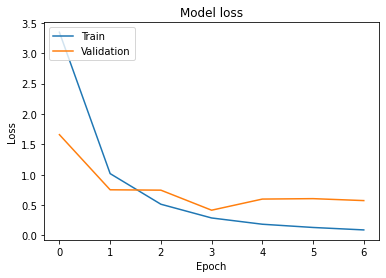

In [60]:
# Plotting CNN model loss 
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

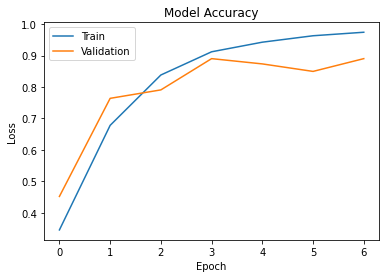

In [61]:
# Plotting CNN model accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [62]:
# Collecting all predicted values in a list
i=0
Pred_l_CNN=[]
while(i<len(predCNN[0])):
  Pred_l_CNN.append(int(np.round(predCNN[0][i])))
  i+=1

In [63]:
# CNN model evaluation - Classification report
from sklearn.metrics import classification_report
hand_gesture_class = classification_report(np.argmax(Y_test,axis=1),np.argmax(ModelCNN.predict(X_test), axis=1))
print(hand_gesture_class)

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       422
           1       0.87      0.95      0.91       450
           2       0.83      0.87      0.85       428
           3       0.97      0.91      0.94       460
           4       0.88      0.85      0.86       486
           5       0.96      0.95      0.95       443
           6       0.94      0.80      0.86       448
           7       0.80      0.91      0.85       463
           8       0.89      0.86      0.88       464
           9       0.97      0.91      0.94       432
          10       0.88      0.85      0.87       454

    accuracy                           0.89      4950
   macro avg       0.89      0.89      0.89      4950
weighted avg       0.89      0.89      0.89      4950



In [64]:
# CNN model evaluation - Confusion matrix
from sklearn.metrics import confusion_matrix
hand_gesture_confu = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(ModelCNN.predict(X_test), axis=1))
print(hand_gesture_confu)

[[394   6   5   0   0   1   2   1   1   0  12]
 [  3 428  13   0   1   1   0   2   0   0   2]
 [  5  19 372   2   5   0   4  10   2   0   9]
 [  4   3  11 419   2   5   0   4   2   2   8]
 [ 18   5   0   2 411   3   8  23  10   3   3]
 [  2   0   0   8   5 419   0   2   0   3   4]
 [  3   5  24   0  20   0 358  22   5   1  10]
 [  1   8  12   0   7   0   1 421  10   0   3]
 [  4   3   2   0   7   2   6  34 401   3   2]
 [  5   2   0   1   3   3   1   5  15 395   2]
 [ 29  11  10   0   4   2   1   4   4   1 388]]


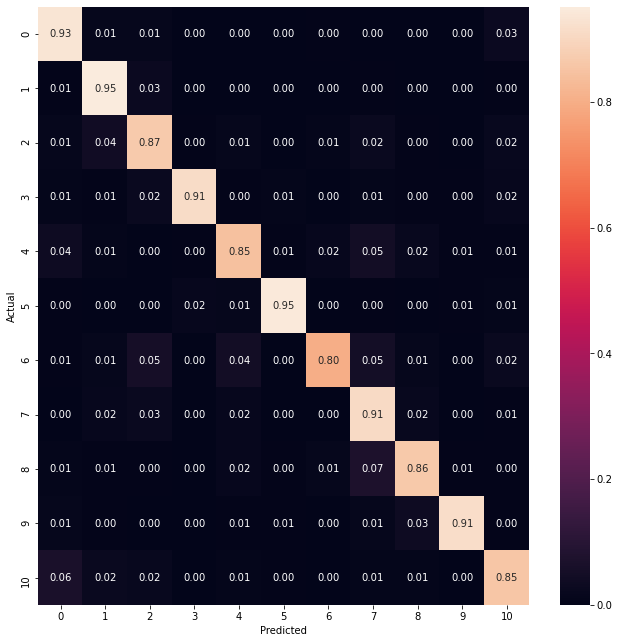

In [65]:
# Plotting confusion matrix using seaborn
import seaborn as sns
cm = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(ModelCNN.predict(X_test), axis=1))
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [66]:
# Defining a function for test image prediction using model 
def validate(ind,Model):
  plt.imshow(data['Pixel'].iloc[ind].reshape(64,64))
  test = np.array(data['Pixel'].iloc[ind])
  test = test.reshape(64,64)
  pred_1=Model.predict(np.array([test]))
  print(pred_1)
      
  hand=int(np.round(np.argmax(pred_1[0])))
  print("Predicted Number: "+ str(hand))
  print("Actual Number: "+ str(np.array(data['Label'].iloc[ind])))

[[1.0000000e+00 2.2549336e-10 2.4730658e-11 7.5459283e-10 5.4509632e-09
  1.5477954e-09 1.4255460e-08 2.0766985e-08 1.5771899e-11 3.1831897e-13
  8.1886536e-10]]
Predicted Number: 0
Actual Number: 0


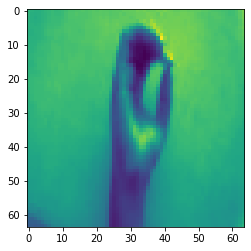

In [67]:
validate(100,ModelCNN)

[[1.0263575e-06 9.7538467e-04 9.9895918e-01 2.0739399e-06 1.0699740e-08
  2.5675016e-13 9.8719038e-06 5.2438914e-05 8.9878107e-08 2.9238187e-09
  1.9113500e-08]]
Predicted Number: 2
Actual Number: 2


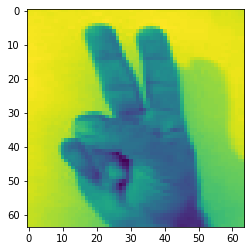

In [68]:
validate(3000,ModelCNN)

[[2.5567497e-04 3.9816870e-05 1.1229033e-03 3.3269126e-03 1.4767761e-02
  6.5131027e-01 5.8032874e-06 4.5668313e-04 4.1919513e-04 2.7132019e-01
  5.6974772e-02]]
Predicted Number: 5
Actual Number: 10


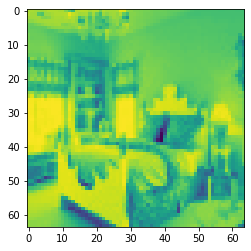

In [69]:
validate(15000,ModelCNN)

[[1.4985126e-02 6.6272698e-08 4.4907196e-03 1.7147155e-03 5.1006559e-02
  3.4250493e-06 9.1485345e-01 1.2908645e-02 3.1952339e-05 8.6280443e-07
  4.4929980e-06]]
Predicted Number: 6
Actual Number: 6


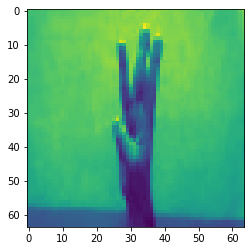

In [70]:
validate(10000,ModelCNN)

# Ensemble Model

In [94]:
def ensembleModel(ind,Model1,Model2,Model3):
  plt.imshow(data['Pixel'].iloc[ind].reshape(64,64))
  test = np.array(data['Pixel'].iloc[ind])
  test = test.reshape(64,64)
  test_ML = test.reshape(4096)

  pred_1=Model1.predict(np.array([test_ML]))
  print(pred_1)   
  hand_1=int(np.round(np.argmax(pred_1[0])))
  
  pred_2=Model2.predict(np.array([test_ML]))
  print(pred_2)   
  hand_2=int(np.round(np.argmax(pred_2[0])))
    
  pred_3=Model3.predict(np.array([test]))
  print(pred_3)   
  hand_3=int(np.round(np.argmax(pred_3[0])))
    
  
  final_pred = np.array([])
  for i in range(0,len(X_test)):
     final_pred = np.argmax(np.append(final_pred, np.max([hand_1, hand_2,hand_3])))
  
  print("Predicted Number: "+ str(final_pred))
  print("Actual Number: "+ str(np.array(data['Label'].iloc[ind])))                                            

[0]
[0]
[[1.0000000e+00 2.2549336e-10 2.4730658e-11 7.5459283e-10 5.4509632e-09
  1.5477954e-09 1.4255460e-08 2.0766985e-08 1.5771899e-11 3.1831897e-13
  8.1886536e-10]]
Predicted Number: 0
Actual Number: 0


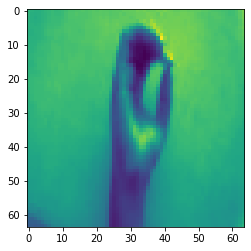

In [95]:
ensembleModel(100,ModelSVM,Model_knn,ModelCNN)